<a href="https://colab.research.google.com/github/GEORGESVARGHESE/introduction-to-Python-/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic (1).csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as snv

In [7]:
dataset=pd.read_csv("titanic.csv")


In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
count=len(dataset)
print(count)

891


In [10]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
print('Median of age column : %.2f' %(dataset['Age']).median(skipna=True))
print('Percentage of missing records in the cabin column : %.2f %%'%(dataset['Cabin'].isnull().sum()/len(dataset)*100))
print('Most common boarding port of embarkation : %s' %dataset['Embarked'].value_counts().idxmax())

Median of age column : 28.00
Percentage of missing records in the cabin column : 77.10 %
Most common boarding port of embarkation : S


In [26]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)
dataset.drop('Cabin',axis=1,inplace=True)
dataset.isnull().sum()



KeyError: ignored

In [27]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [30]:
dataset.drop('PassengerId',axis=1,inplace=True)
dataset.drop('Name',axis=1,inplace=True)
dataset.drop('Ticket',axis=1,inplace=True)

KeyError: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

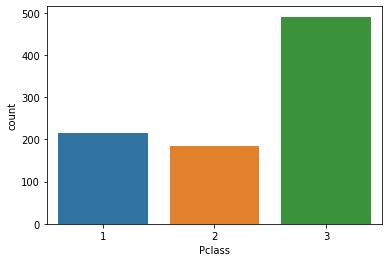

In [39]:
snv.countplot("Pclass",data=dataset)
dataset['Pclass'].value_counts()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


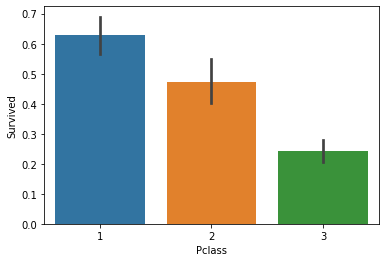

In [40]:
snv.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()